# FIFA Players Classification

This notebook contains the code to train models for the FIFA Classification problem based on their attributes

## Step 1: Import libraries

Libraries we will be using:
- **tensorflow** and **keras**: APIs for neural network model construction and training
- **numpy**: Numerical python library.
- **pandas**: Will be used to work with dataframes from .csv files.
- **sklearn**: Will be used to modify the labels of the data and do some statistical modifications.
- **matplotlib**: Will be used to plot graphics.
- **time**: To measure training time.
- **datetime**: To get the datetime a new model is created and use that to create its name

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

## Step 2: Load data

We first define the path to our data

In [2]:
DATA_FOLDER = "../Data"

ATT_FILE = f"{DATA_FOLDER}/FootballPlayerPreparedCleanAttributes.csv"
IMPUTED_ATT_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/FootballPlayerOneHotEncodedClasses.csv"
IMPUTED_ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

Specify training options:
- **IMPUTED_DATA**: We will use file with data imputed
- **TRAIN_RATE**: The amount of instances to use during training, it will also determine the dev and test instances number indirectly

In [3]:
IMPUTED_DATA = False    # Use imputed dataset
TRAIN_RATE = 0.8        # The division of the data for training, validation and test

Because our data has more than 10000, we will be using 80-10-10 split in our dataset:
- **80%** for training
- **10%** for validation/dev test
- **10%** for final test

In [4]:
if IMPUTED_DATA:
    attributes = pd.read_csv(ATT_IMPUTED_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_IMPUTED_FILE)
else:
    attributes = pd.read_csv(ATT_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_FILE)

n_total_instances = attributes.shape[0]
n_train_instances = int(n_total_instances * TRAIN_RATE)
n_dev_instances = int((n_total_instances - n_train_instances)/2)

instances_train = attributes.values[:n_train_instances]
labels_train = labels.values[:n_train_instances]

instances_dev = attributes.values[n_train_instances: n_train_instances + n_dev_instances]
labels_dev = labels.values[n_train_instances: n_train_instances + n_dev_instances]

print("instances_train:", instances_train.shape)
print("labels_train:", labels_train.shape)
print("instances_dev:", instances_dev.shape)
print("labels_dev:",labels_dev.shape)

instances_train: (12897, 17)
labels_train: (12897, 4)
instances_dev: (1612, 17)
labels_dev: (1612, 4)


## Step 3: Initialize variables
- **INPUT_SIZE**: The size of the training instances
- **OUTPUT_SIZE**: The number of possible classes
- **NUM_TRAINING_EXAMPLES**: The number of possible classes
- **NUM_DEV_EXAMPLES**: The number of validation/dev test instances

In [5]:
INPUT_SIZE = instances_train.shape[1]
OUTPUT_SIZE = labels_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(instances_train.shape[0]/1))
NUM_DEV_EXAMPLES = int(round(instances_dev.shape[0]/1))

## Step 4: Set hyperparameters

- **LEARNING_RATE** $\alpha$: The step size in the learning process
- **BATCH_SIZE**: The size of each batch
- **N_HIDDEN**: Number of neurons in the hidden.

The learning process stops when it reaches 20,000 learning iterations. An iteration comprises presenting the network *batch_size* learning examples and then adjusting the weights (parameters).

In [6]:
N_EPOCHS = 400
LEARNING_RATE = 0.001
BATCH_SIZE = 256
ACTIVATION = "relu"
N_HIDDEN = [2048, 1024, 512, 256, 128, 64, 32]
REGULARIZER = keras.regularizers.l2(0.1)
INITIALIZER = keras.initializers.he_normal(seed=None)
LOSS = tf.keras.losses.categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999)
METRICS = ["categorical_accuracy"]

## Step 5: Build the model

In [7]:
def architecture1():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,), batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons, activation=ACTIVATION))
    model.add(keras.layers.Dense(OUTPUT_SIZE, activation="softmax"))
    
    model_name = "D512"
    return model, model_name


def architecture2():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,),
                                      batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons,
                                     activation=ACTIVATION,
                                     kernel_regularizer=REGULARIZER
                                    ))
        
    model.add(keras.layers.Dense(OUTPUT_SIZE, 
                                 activation="softmax"))
    
    model_name = "D128_D64_D32"
    return model, model_name

def architecture3():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,),
                                      batch_size=None))
    
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation(ACTIVATION))
        
    model.add(keras.layers.Dense(OUTPUT_SIZE,
                                 activation="softmax"
                                ))
    model_name = "D128_BN_D64_BN_D32_BN"
    return model, model_name

def architecture4():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,),
                                      batch_size=None))
    
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons,
                                     kernel_regularizer=REGULARIZER,
                                     kernel_initializer=keras.initializers.HeNormal(seed=None),
                                     use_bias=False
                                     ))
    
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation(ACTIVATION))
        
    model.add(keras.layers.Dense(OUTPUT_SIZE,
                                 activation="softmax"
                                ))
    model_name = "D2048_BN_D1024_BN_D512_BN_D256_BN_D128_BN_D64_BN_D32_BN"
    return model, model_name


def compile_model(model):
    my_model.compile(loss=LOSS,
                     optimizer=OPTIMIZER,
                     metrics=METRICS)

In [8]:
my_model, model_name = architecture4()

In [9]:
compile_model(my_model)

## Step 6: Train the model

In [10]:
start_time = time.perf_counter()
history = my_model.fit(instances_train,
                       labels_train,
                       batch_size=BATCH_SIZE,
                       epochs=N_EPOCHS,
                       verbose=1,
                       validation_data=(instances_dev, labels_dev))
end_time = time.perf_counter()

Epoch 1/400
51/51 [==============================] - 4s 23ms/step - loss: 543.1027 - categorical_accuracy: 0.6821 - val_loss: 376.4753 - val_categorical_accuracy: 0.3443
Epoch 2/400
51/51 [==============================] - 1s 18ms/step - loss: 314.7173 - categorical_accuracy: 0.7456 - val_loss: 266.1553 - val_categorical_accuracy: 0.2345
Epoch 3/400
51/51 [==============================] - 1s 18ms/step - loss: 232.7902 - categorical_accuracy: 0.7447 - val_loss: 203.0365 - val_categorical_accuracy: 0.2339
Epoch 4/400
51/51 [==============================] - 1s 19ms/step - loss: 178.8658 - categorical_accuracy: 0.7378 - val_loss: 157.1529 - val_categorical_accuracy: 0.2339
Epoch 5/400
51/51 [==============================] - 1s 18ms/step - loss: 138.4800 - categorical_accuracy: 0.7353 - val_loss: 122.0177 - val_categorical_accuracy: 0.2339
Epoch 6/400
51/51 [==============================] - 1s 18ms/step - loss: 107.3722 - categorical_accuracy: 0.7316 - val_loss: 94.7777 - val_categorica

Epoch 50/400
51/51 [==============================] - 1s 22ms/step - loss: 0.6959 - categorical_accuracy: 0.7763 - val_loss: 1.1004 - val_categorical_accuracy: 0.6855
Epoch 51/400
51/51 [==============================] - 1s 22ms/step - loss: 0.6790 - categorical_accuracy: 0.7764 - val_loss: 1.6659 - val_categorical_accuracy: 0.4560
Epoch 52/400
51/51 [==============================] - 1s 22ms/step - loss: 0.6922 - categorical_accuracy: 0.7737 - val_loss: 1.4118 - val_categorical_accuracy: 0.4770
Epoch 53/400
51/51 [==============================] - 1s 22ms/step - loss: 0.6439 - categorical_accuracy: 0.7810 - val_loss: 1.9335 - val_categorical_accuracy: 0.4287
Epoch 54/400
51/51 [==============================] - 1s 22ms/step - loss: 0.6151 - categorical_accuracy: 0.7816 - val_loss: 2.1177 - val_categorical_accuracy: 0.4349
Epoch 55/400
51/51 [==============================] - 1s 22ms/step - loss: 0.6279 - categorical_accuracy: 0.7855 - val_loss: 1.0928 - val_categorical_accuracy: 0.558

51/51 [==============================] - 1s 22ms/step - loss: 0.5411 - categorical_accuracy: 0.7962 - val_loss: 1.8683 - val_categorical_accuracy: 0.4361
Epoch 100/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5770 - categorical_accuracy: 0.7896 - val_loss: 0.7196 - val_categorical_accuracy: 0.6935
Epoch 101/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5621 - categorical_accuracy: 0.7987 - val_loss: 1.6752 - val_categorical_accuracy: 0.4423
Epoch 102/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5590 - categorical_accuracy: 0.7937 - val_loss: 0.7762 - val_categorical_accuracy: 0.6687
Epoch 103/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5673 - categorical_accuracy: 0.7884 - val_loss: 0.6802 - val_categorical_accuracy: 0.7221
Epoch 104/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5766 - categorical_accuracy: 0.7940 - val_loss: 1.5653 - val_categorical_accuracy: 0.5682
Epoch 

Epoch 148/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5414 - categorical_accuracy: 0.7969 - val_loss: 1.2445 - val_categorical_accuracy: 0.4758
Epoch 149/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5372 - categorical_accuracy: 0.7897 - val_loss: 1.6237 - val_categorical_accuracy: 0.5478
Epoch 150/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5271 - categorical_accuracy: 0.7985 - val_loss: 0.7927 - val_categorical_accuracy: 0.7258
Epoch 151/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5280 - categorical_accuracy: 0.7969 - val_loss: 1.9019 - val_categorical_accuracy: 0.4175
Epoch 152/400
51/51 [==============================] - 1s 21ms/step - loss: 0.5362 - categorical_accuracy: 0.7937 - val_loss: 0.6390 - val_categorical_accuracy: 0.7432
Epoch 153/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5373 - categorical_accuracy: 0.7898 - val_loss: 1.4925 - val_categorical_accuracy:

Epoch 197/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5029 - categorical_accuracy: 0.8038 - val_loss: 1.0230 - val_categorical_accuracy: 0.4876
Epoch 198/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4995 - categorical_accuracy: 0.8060 - val_loss: 2.5585 - val_categorical_accuracy: 0.4479
Epoch 199/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5139 - categorical_accuracy: 0.8018 - val_loss: 1.2050 - val_categorical_accuracy: 0.6185
Epoch 200/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5282 - categorical_accuracy: 0.7998 - val_loss: 0.8809 - val_categorical_accuracy: 0.6501
Epoch 201/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5123 - categorical_accuracy: 0.7989 - val_loss: 2.5912 - val_categorical_accuracy: 0.5515
Epoch 202/400
51/51 [==============================] - 1s 22ms/step - loss: 0.5215 - categorical_accuracy: 0.8033 - val_loss: 1.0810 - val_categorical_accuracy:

Epoch 246/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4879 - categorical_accuracy: 0.8029 - val_loss: 1.3579 - val_categorical_accuracy: 0.5738
Epoch 247/400
51/51 [==============================] - 1s 24ms/step - loss: 0.4834 - categorical_accuracy: 0.8048 - val_loss: 0.6284 - val_categorical_accuracy: 0.7326
Epoch 248/400
51/51 [==============================] - 1s 24ms/step - loss: 0.4955 - categorical_accuracy: 0.8031 - val_loss: 0.7096 - val_categorical_accuracy: 0.7010
Epoch 249/400
51/51 [==============================] - 1s 28ms/step - loss: 0.4921 - categorical_accuracy: 0.8102 - val_loss: 0.8845 - val_categorical_accuracy: 0.6154
Epoch 250/400
51/51 [==============================] - 1s 27ms/step - loss: 0.4811 - categorical_accuracy: 0.8065 - val_loss: 1.3496 - val_categorical_accuracy: 0.5217
Epoch 251/400
51/51 [==============================] - 1s 26ms/step - loss: 0.4858 - categorical_accuracy: 0.8083 - val_loss: 0.5859 - val_categorical_accuracy:

Epoch 295/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4865 - categorical_accuracy: 0.8055 - val_loss: 0.5068 - val_categorical_accuracy: 0.7847
Epoch 296/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4922 - categorical_accuracy: 0.8028 - val_loss: 0.5818 - val_categorical_accuracy: 0.7475
Epoch 297/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4807 - categorical_accuracy: 0.8082 - val_loss: 0.5382 - val_categorical_accuracy: 0.7655
Epoch 298/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4747 - categorical_accuracy: 0.8064 - val_loss: 0.7659 - val_categorical_accuracy: 0.6514
Epoch 299/400
51/51 [==============================] - 1s 21ms/step - loss: 0.4836 - categorical_accuracy: 0.8083 - val_loss: 0.5235 - val_categorical_accuracy: 0.7835
Epoch 300/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4809 - categorical_accuracy: 0.8107 - val_loss: 1.2821 - val_categorical_accuracy:

Epoch 344/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4863 - categorical_accuracy: 0.8076 - val_loss: 0.5087 - val_categorical_accuracy: 0.7847
Epoch 345/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4696 - categorical_accuracy: 0.8114 - val_loss: 1.5760 - val_categorical_accuracy: 0.5335
Epoch 346/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4775 - categorical_accuracy: 0.8102 - val_loss: 3.6851 - val_categorical_accuracy: 0.4380
Epoch 347/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4688 - categorical_accuracy: 0.8123 - val_loss: 1.9971 - val_categorical_accuracy: 0.3995
Epoch 348/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4707 - categorical_accuracy: 0.8101 - val_loss: 0.8447 - val_categorical_accuracy: 0.6352
Epoch 349/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4741 - categorical_accuracy: 0.8084 - val_loss: 1.2940 - val_categorical_accuracy:

Epoch 393/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4738 - categorical_accuracy: 0.8064 - val_loss: 1.5524 - val_categorical_accuracy: 0.4690
Epoch 394/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4682 - categorical_accuracy: 0.8101 - val_loss: 2.5723 - val_categorical_accuracy: 0.3102
Epoch 395/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4759 - categorical_accuracy: 0.8093 - val_loss: 1.2756 - val_categorical_accuracy: 0.5372
Epoch 396/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4771 - categorical_accuracy: 0.8045 - val_loss: 0.5627 - val_categorical_accuracy: 0.7661
Epoch 397/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4745 - categorical_accuracy: 0.8063 - val_loss: 0.8043 - val_categorical_accuracy: 0.7016
Epoch 398/400
51/51 [==============================] - 1s 22ms/step - loss: 0.4798 - categorical_accuracy: 0.8038 - val_loss: 0.7279 - val_categorical_accuracy:

## Step 7: Analyze results

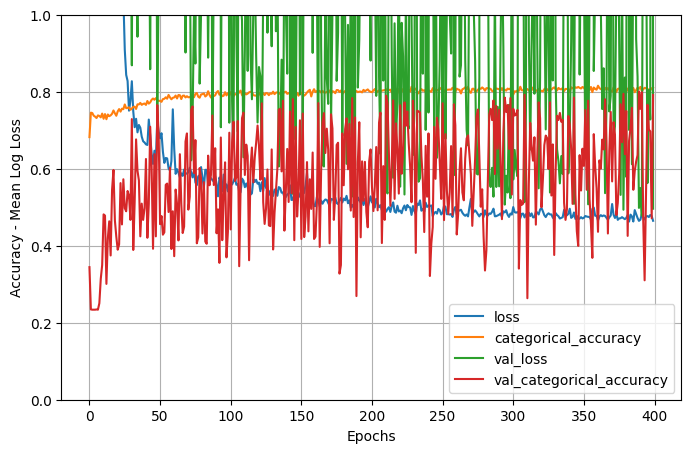

In [11]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
training_accuracy = round(results.categorical_accuracy.values[-1:][0]*100, 2)
val_accuracy = round(results.val_categorical_accuracy.values[-1:][0]*100, 2)
training_error = round((1 - results.categorical_accuracy.values[-1:][0])*100, 2)
test_error = round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 2)
human_error = 5
bias = round(training_error - human_error, 2)
variance = round(test_error - training_error, 2)
training_time = round(end_time - start_time)
print("Training accuracy: ", training_accuracy, "%")
print("Validationa accuracy", val_accuracy, "%")
print("Error (training):", training_error, "%")
print("Error (test):", test_error, "%")
print("Bias:", bias)
print("Variance:", variance)
print("Time: ", training_time, "seconds")

Training accuracy:  81.09 %
Validationa accuracy 79.16 %
Error (training): 18.91 %
Error (test): 20.84 %
Bias: 13.91
Variance: 1.93
Time:  454 seconds


In [13]:
def draw_confusion_matrix(cm, categories, normalize=True):
    # Draw confusion matrix
    fig = plt.figure(figsize=[3*pow(len(categories), 0.5), 2*pow(len(categories), 0.5)])
    ax = fig.add_subplot(111)
    if normalize:
        cm = cm.astype('float') / np.maximum(cm.sum(axis=1)[:, np.newaxis], np.finfo(np.float64).eps)
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.get_cmap('Blues'))
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=categories, yticklabels=categories, ylabel='Annotation', xlabel='Prediction')
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center", color="white" if cm[i, j] > thresh else "black", fontsize=int(12-pow(len(categories), 0.5)))
    fig.tight_layout()
    plt.show(fig)


51/51 [==============================] - 0s 4ms/step


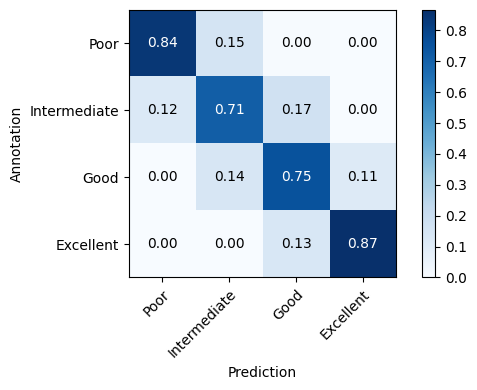

In [14]:
labels_pred = my_model.predict(instances_dev)
cm = confusion_matrix(np.argmax(labels_dev, axis=1), np.argmax(labels_pred, axis=1))
draw_confusion_matrix(cm, ["Poor", "Intermediate", "Good", "Excellent"])

## Step 8: Save results

In [15]:
RESULTS_FOLDER = "../Results"
RESULTS_FILE = f"{RESULTS_FOLDER}/models_performance.csv"

In [16]:
results_df = pd.read_csv(RESULTS_FILE, index_col = 0)

In [17]:
COLUMNS = [
    'model_name',
    'epochs',
    'learning_rate',
    'batch_size',
    'activation',
    'loss',
    'optimizer',
    'regularization',
    'initializer',
    'train_accuracy',
    'validation_accuracy',
    'bias',
    'variance',
    'training_time'
]

new_result = [[
    model_name,
    N_EPOCHS,
    LEARNING_RATE,
    BATCH_SIZE,
    ACTIVATION,
    "categorical_crossentropy",
    "ADAM b109 b20999",
    "l2 0.1",
    "he_normal",
    training_accuracy,
    val_accuracy,
    bias,
    variance,
    training_time]]

new_result_df = pd.DataFrame(new_result, columns=COLUMNS)
concatenation = pd.concat([results_df, new_result_df], ignore_index=True)
concatenation.to_csv(RESULTS_FILE)


In [18]:
# last_five = results_df.tail(5)
last_five = concatenation.tail(5)
print(last_five)
print("\n---Metrics---")
print(last_five[["train_accuracy", "validation_accuracy", "bias", "variance", "training_time"]].describe())

                                           model_name  epochs  learning_rate  \
78  D2048_BN_D1024_BN_D512_BN_D256_BN_D128_BN_D64_...     400          0.001   
79  D2048_BN_D1024_BN_D512_BN_D256_BN_D128_BN_D64_...     400          0.001   
80  D2048_BN_D1024_BN_D512_BN_D256_BN_D128_BN_D64_...     400          0.001   
81  D2048_BN_D1024_BN_D512_BN_D256_BN_D128_BN_D64_...     400          0.001   
82  D2048_BN_D1024_BN_D512_BN_D256_BN_D128_BN_D64_...     400          0.001   

    batch_size activation                      loss         optimizer  \
78         256       relu  categorical_crossentropy  ADAM b109 b20999   
79         256       relu  categorical_crossentropy  ADAM b109 b20999   
80         256       relu  categorical_crossentropy  ADAM b109 b20999   
81         256       relu  categorical_crossentropy  ADAM b109 b20999   
82         256       relu  categorical_crossentropy  ADAM b109 b20999   

   regularization  train_accuracy  validation_accuracy   bias  variance  \
78   

In [19]:
MODELS_FOLDER = "../Models"
save_name = f"{MODELS_FOLDER}/{model_name}-4.h5"
my_model.save(save_name)